In [17]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML


In [20]:
#path='/content/drive/My Drive/Colab Notebooks'
#file1=os.path.join(path,"isochrones.npy")
file1="/isochrones.npy"
isochrone_table = np.load(file1)


### You are given a simulated galaxy, very different to scale, but with the same stellar astrophysics as our own galaxy

In [21]:
#file2=os.path.join(path,"stars.csv")
file2="/stars.csv"
galaxy = pandas.read_csv(file2)
display(galaxy)

,G,BP,RP,label,ra,dec
0,14.753930,15.126300,14.194900,bulge,-53.309745,2.695967
1,22.155009,24.341797,20.855339,bulge,-32.976843,-8.972619
2,19.516673,20.825264,18.404217,bulge,-45.611870,0.234306
3,NaN,NaN,NaN,bulge,-41.300420,7.935835
4,21.189415,22.709030,20.011109,bulge,-43.680714,-11.162685
...,...,...,...,...,...,...
75892,NaN,NaN,NaN,dwarfgalaxy3,-70.338090,11.213764
75893,NaN,NaN,NaN,dwarfgalaxy3,-69.825846,5.555870
75894,NaN,NaN,NaN,dwarfgalaxy3,-72.140640,8.815166
75895,NaN,NaN,NaN,dwarfgalaxy3,-69.622166,7.154625


### Let's plot the sky you are seeing, standing on a different hypothetical earth in this galaxy

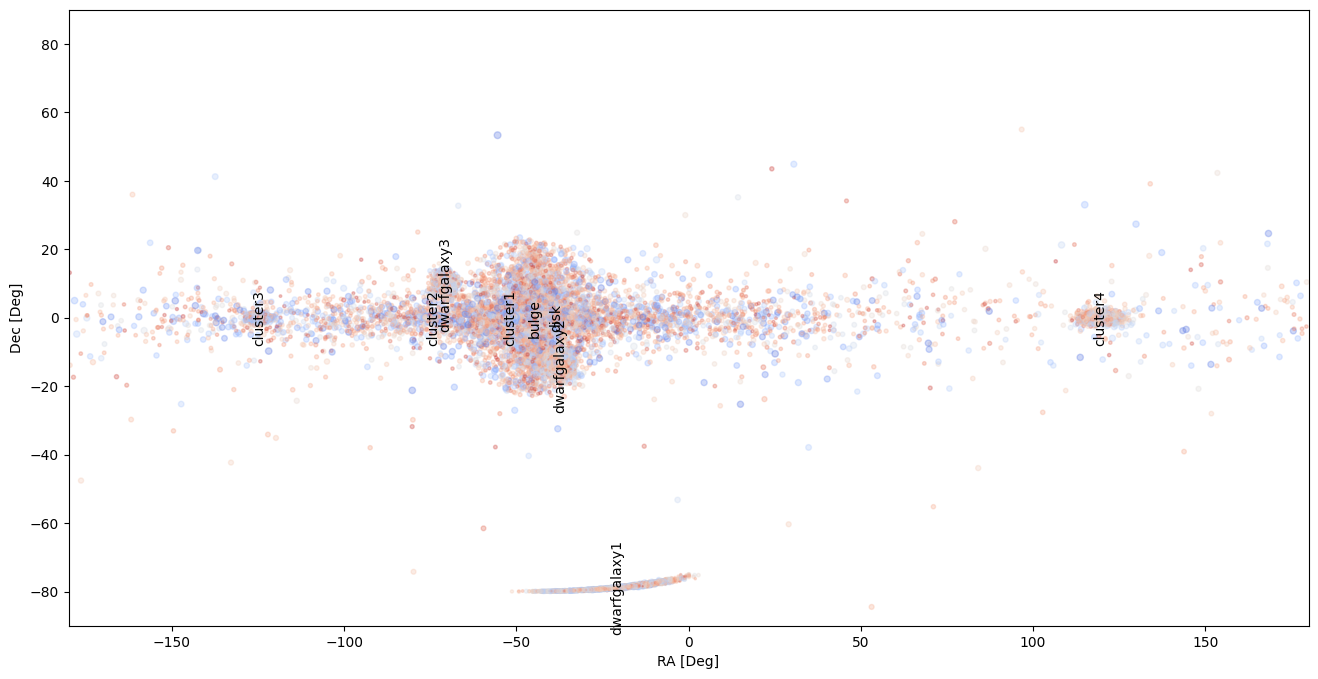

In [22]:
plt.figure(figsize=(16,8))

### plot RA DEC of your galaxy
plt.scatter(galaxy['ra'],galaxy['dec'],
            s=np.nanmax(galaxy['G'])-galaxy['G'],
            c=galaxy['BP']-galaxy['RP'],
            cmap='coolwarm',alpha=0.3)

### Label the key clusters and dwarf galaxies
for label in np.unique(galaxy['label']):
    population = galaxy['label']==label
    plt.text(np.nanmean(galaxy['ra'][population]),
            np.nanmean(galaxy['dec'][population]),
            label,ha='center',va='center',rotation=90)


plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel("RA [Deg]")
plt.ylabel("Dec [Deg]")
plt.show()

### Like our own Milky Way, your galaxy is made of a disk, a bulge, a number of star clusters in the disk, and a number of dwarf galaxies in the halo.

### You can examine the colour magnitude diagram of any of the clusters or dwarf galaxies. Choose from the following labels

In [ ]:
labellist = np.unique(galaxy['label'])
print(labellist)

['bulge' 'cluster1' 'cluster2' 'cluster3' 'cluster4' 'disk' 'dwarfgalaxy1'
 'dwarfgalaxy2' 'dwarfgalaxy3']


In [25]:
%matplotlib inline
### For example let's overplot the evolution tracks to CMD to cluster 1

toplot = 'disk' ### modify this to which ever label you want


population = galaxy['label'] == toplot
def shift_cmd(dmag,mass):
    iso = isochrone_table[abs(isochrone_table[:,1]-mass) == min(abs(isochrone_table[:,1]-mass))]
    plt.plot(iso[:,3]-iso[:,4],iso[:,2],color='r')
    plt.scatter(galaxy[population]['BP']-galaxy[population]['RP'],galaxy[population]['G']+dmag,s=0.8)
    plt.ylim(np.nanmax(galaxy[population]['G'])+dmag,np.nanmin(galaxy[population]['G'])+dmag)
    plt.xlabel("BP-RP",fontsize=12)
    plt.ylabel("G",fontsize=12)
    plt.xlim(-0.5,3)

interact(shift_cmd, dmag = widgets.FloatSlider(value=0,min=-20,max=5.0,step=0.5),mass = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1))

interactive(children=(FloatSlider(value=0.0, description='dmag', max=5.0, min=-20.0, step=0.5), FloatSlider(va…

<function __main__.shift_cmd(dmag, mass)>

In [26]:
toplot = 'disk' ### modify this to which ever label you want
population = galaxy['label'] == toplot

def shift_cmd(age,dmag):

    iso = isochrone_table[abs(isochrone_table[:,0]-age) == min(abs(isochrone_table[:,0]-age))]

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    plt.scatter(galaxy[population]['BP']-galaxy[population]['RP'],galaxy[population]['G']+dmag,s=0.8)

    plt.plot(iso[:,3]-iso[:,4],iso[:,2],color='r')

    ax.set_ylim(ax.get_ylim()[::-1])

    plt.xlabel("Gaia BP-RP Colour",fontsize=12)
    plt.ylabel("Gaia magnitude",fontsize=12)


interact(shift_cmd, dmag = widgets.FloatSlider(value=-5,min=-20,max=5.0,step=0.5),age = widgets.FloatSlider(value=6,min=6,max=10,step=0.1))

interactive(children=(FloatSlider(value=6.0, description='age', max=10.0, min=6.0), FloatSlider(value=-5.0, de…

<function __main__.shift_cmd(age, dmag)>

In [16]:
%matplotlib inline
### For example let's fit a CMD to cluster 1

toplot = 'bulge' ### modify this to which ever label you want


population = galaxy['label'] == toplot
def shift_cmd(dmag,mass):
    iso = isochrone_table[abs(isochrone_table[:,1]-mass) == min(abs(isochrone_table[:,1]-mass))]
    plt.plot(iso[:,3]-iso[:,4],iso[:,2],color='r')
    plt.scatter(galaxy[population]['BP']-galaxy[population]['RP'],galaxy[population]['G']+dmag,s=0.8)
    plt.ylim(np.nanmax(galaxy[population]['G'])+dmag,np.nanmin(galaxy[population]['G'])+dmag)
    plt.xlabel("BP-RP",fontsize=12)
    plt.ylabel("G",fontsize=12)
    plt.xlim(-0.5,3)

interact(shift_cmd, dmag = widgets.FloatSlider(value=0,min=-20,max=5.0,step=0.5),mass = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1))

interactive(children=(FloatSlider(value=0.0, description='dmag', max=5.0, min=-20.0, step=0.5), FloatSlider(va…

<function __main__.shift_cmd(dmag, mass)>